# Data and Empirics

## Pandas

### Exercise 1

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

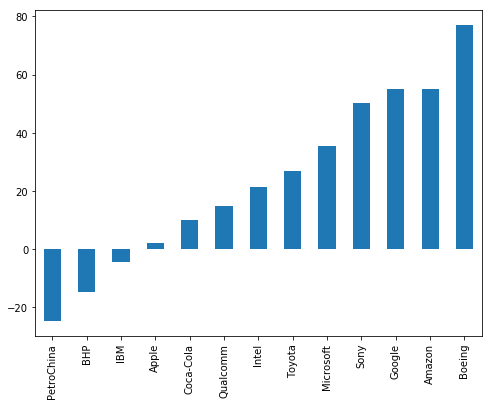

In [139]:
url = 'https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv'
closing_prices = pd.read_csv(url)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = 100 * (closing_prices.iloc[-1,1:] - closing_prices.iloc[0,1:]) / closing_prices.iloc[0,1:]
price_change.sort_values(inplace = True)
price_change.index = price_change.index.map(lambda x: ticker_list[x])

fig, ax = plt.subplots(figsize = (8,6))
price_change.plot(kind='bar', ax=ax)
plt.show()

## Pandas for Panel Data

### Exercise 1

In [2]:
import pandas as pd

In [70]:
url = 'https://raw.githubusercontent.com/QuantEcon/QuantEcon.lectures.code/master/pandas_panel/employ.csv'
employ = pd.read_csv(url,index_col=0)
employ.head()

,GEO,AGE,UNIT,SEX,INDIC_EM,Value,DATE
0,European Union (28 countries),From 15 to 24 years,Thousand persons,Total,Active population,26839.0,2007-01-01
1,European Union (28 countries),From 15 to 24 years,Thousand persons,Total,Total employment (resident population concept ...,22669.0,2007-01-01
2,European Union (28 countries),From 15 to 24 years,Thousand persons,Males,Active population,14665.0,2007-01-01
3,European Union (28 countries),From 15 to 24 years,Thousand persons,Males,Total employment (resident population concept ...,12430.0,2007-01-01
4,European Union (28 countries),From 15 to 24 years,Thousand persons,Females,Active population,12173.0,2007-01-01


In [71]:
employ = employ.pivot_table(values='Value',index='DATE',columns=employ.columns.drop(['Value', 'DATE']).tolist())
employ.index = pd.to_datetime(employ.index)
employ.head()

GEO                               Austria  \
AGE                   From 15 to 24 years   
UNIT       Percentage of total population   
SEX                               Females   
INDIC_EM                Active population   
DATE                                        
2007-01-01                           56.0   
2008-01-01                           56.2   
2009-01-01                           56.2   
2010-01-01                           54.0   
2011-01-01                           54.8   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               50.6     
2008-01-01                                               51.3     
2009-01-01                                               50.5     
2010-01-01                                               48.9     
2011-01-01                                               49.8     

GEO                           \
AGE                            
UNIT                           
SEX                    Males   
INDIC_EM   Active population   
DATE                           
2007-01-01              62.9   
2008-01-01              62.9   
2009-01-01              62.9   
2010-01-01              62.6   
2011-01-01              63.6   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               57.0     
2008-01-01                                               57.6     
2009-01-01                                               55.8     
2010-01-01                                               56.6     
2011-01-01                                               58.0     

GEO                           \
AGE                            
UNIT                           
SEX                    Total   
INDIC_EM   Active population   
DATE                           
2007-01-01              59.4   
2008-01-01              59.5   
2009-01-01              59.5   
2010-01-01              58.3   
2011-01-01              59.2   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                                                               
INDIC_EM   Total employment (resident population concept - LFS)   
DATE                                                              
2007-01-01                                               53.8     
2008-01-01                                               54.4     
2009-01-01                                               53.1     
2010-01-01                                               52.8     
2011-01-01                                               53.9     

GEO                           \
AGE                            
UNIT        Thousand persons   
SEX                  Females   
INDIC_EM   Active population   
DATE                           
2007-01-01             278.0   
2008-01-01             279.0   
2009-01-01             279.0   
2010-01-01             267.0   
2011-01-01             270.0   

GEO                                                              \
AGE                                                               
UNIT                                                              
SEX                           

In [93]:
employ.columns.names

FrozenList(['GEO', 'AGE', 'UNIT', 'SEX', 'INDIC_EM'])

In [103]:
for n in range(employ.columns.nlevels):
    print(employ.columns.levels[n])
    print(50*'-')

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Euro area (17 countries)',
       'Euro area (18 countries)', 'Euro area (19 countries)',
       'European Union (15 countries)', 'European Union (27 countries)',
       'European Union (28 countries)', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')
--------------------------------------------------
Index(['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years'], dtype='object', name='AGE')
--------------------------------------------------
Index(['Pe